In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from imdb import Cinemagoer

In [3]:
sns.set_style('darkgrid') 
plt.rc('axes', titlesize=18)    
plt.rc('axes', labelsize=13)    
plt.rc('xtick', labelsize=14)    
plt.rc('ytick', labelsize=14)  
plt.rc('legend', fontsize=13) 
plt.rc('font', size=13)

# Show Data
Data was collected using [Cinemagoer](https://cinemagoer.github.io/) via imdbscrape.py and imported here.

**_Note:_** Data is from February 2023

In [4]:
shows = pd.read_csv('raw/shows.csv')
shows

,name,ids,imdb_rank,years,genre,imdb_rating,imdb_votes
0,The Last of Us,3581920,1,2023-,"['Action', 'Adventure', 'Drama', 'Horror', 'Sc...",9.2,220703.0
1,You,7335184,2,2018-,"['Crime', 'Drama', 'Romance', 'Thriller']",7.7,257575.0
2,Poker Face,14269590,3,2023-,"['Crime', 'Drama', 'Mystery']",8.1,13047.0
3,1923,18335752,4,2022-2023,"['Drama', 'Western']",8.6,17809.0
4,Yellowstone,4236770,5,2018-2023,"['Drama', 'Western']",8.7,162886.0
...,...,...,...,...,...,...,...
145,The Recruit,16030542,146,2022-,"['Action', 'Adventure', 'Crime', 'Drama', 'Thr...",7.4,30563.0
146,Magnum P.I.,7942796,147,2018-2023,"['Action', 'Adventure', 'Crime']",6.1,14402.0
147,Fear the Walking Dead,3743822,148,2015-2023,"['Drama', 'Horror', 'Sci-Fi', 'Thriller']",6.8,132664.0
148,Funny Woman,15309272,149,2023-,['Comedy'],7.3,589.0


# MetaCritic Information

In [5]:
meta = pd.read_csv('raw/metacritic.csv')
meta.columns = ['name', 'metacritic', 'meta_user']
meta = meta.drop(0)

In [6]:
ratingsdict = {'sample': [99, 8.3, 3]}
for index, row in meta.iterrows():
  split = row['name'].split(':')
  if split[0] in ratingsdict.keys():
    if (row['metacritic'] == 'tbd' or row['meta_user'] == 'tbd') == False:
      ratingsdict[split[0]][2] = ratingsdict[split[0]][2] + 1
      ratingsdict[split[0]][0] = round(((ratingsdict[split[0]][0] * (ratingsdict[split[0]][2] - 1)) + float(row['metacritic'])) / ratingsdict[split[0]][2], 2)
      ratingsdict[split[0]][1] = round(((ratingsdict[split[0]][1] * (ratingsdict[split[0]][2] - 1)) + float(row['meta_user'])) / ratingsdict[split[0]][2], 2)
  else:
    if row['metacritic'] == 'tbd' or row['meta_user'] == 'tbd':
      ratingsdict[split[0]] = [0, 0, 0]
    else:
      ratingsdict[split[0]] = [float(row['metacritic']), float(row['meta_user']), 1]

In [7]:
name_list = []
metacritic_list = []
meta_user_list = []
for name in shows['name']:
  name_list.append(name)

for i in range(len(name_list)):
  if name_list[i] in ratingsdict.keys():
    if ratingsdict[name_list[i]][0] == 0.0:
      metacritic_list.append(np.NaN)
      meta_user_list.append(np.NaN)
    else:
      metacritic_list.append(ratingsdict[name_list[i]][0])
      meta_user_list.append(ratingsdict[name_list[i]][1])
  else:
    metacritic_list.append(np.NaN)
    meta_user_list.append(np.NaN)

In [8]:
metacritic_array = np.array(metacritic_list)
shows['metacritic'] = metacritic_array.tolist()

In [9]:
meta_user_array = np.array(meta_user_list)
shows['meta_user_rating'] = meta_user_array.tolist()

In [10]:
for index, row in shows.iterrows():
  if row['meta_user_rating'] < 0.1:
    shows.at[row['meta_user_rating']] = np.NaN
  if row['metacritic'] < 0.1:
    shows.at[row['metacritic']] = np.NaN

In [11]:
shows

,name,ids,imdb_rank,years,genre,imdb_rating,imdb_votes,metacritic,meta_user_rating
0,The Last of Us,3581920,1,2023-,"['Action', 'Adventure', 'Drama', 'Horror', 'Sc...",9.2,220703.0,84.0,7.7
1,You,7335184,2,2018-,"['Crime', 'Drama', 'Romance', 'Thriller']",7.7,257575.0,NaN,NaN
2,Poker Face,14269590,3,2023-,"['Crime', 'Drama', 'Mystery']",8.1,13047.0,NaN,NaN
3,1923,18335752,4,2022-2023,"['Drama', 'Western']",8.6,17809.0,67.0,5.8
4,Yellowstone,4236770,5,2018-2023,"['Drama', 'Western']",8.7,162886.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
145,The Recruit,16030542,146,2022-,"['Action', 'Adventure', 'Crime', 'Drama', 'Thr...",7.4,30563.0,NaN,NaN
146,Magnum P.I.,7942796,147,2018-2023,"['Action', 'Adventure', 'Crime']",6.1,14402.0,NaN,NaN
147,Fear the Walking Dead,3743822,148,2015-2023,"['Drama', 'Horror', 'Sci-Fi', 'Thriller']",6.8,132664.0,60.0,5.5
148,Funny Woman,15309272,149,2023-,['Comedy'],7.3,589.0,NaN,NaN


# Content Methodology Data
(Primary SVOD)

In [12]:
method = pd.read_csv('raw/svod.csv')
method.columns = ['name', 'service']

In [13]:
method

,name,service
0,The Last of Us,HBO Max
1,You,Netflix
2,Poker Face,Peacock
3,1923,Paramount +
4,Yellowstone,Peacock
...,...,...
145,The Recruit,Netflix
146,Magnum P.I.,Peacock
147,Fear the Walking Dead,Hulu
148,Funny Woman,Showtime


In [14]:
shows = shows.merge(method, how = 'left', on = ['name'])
shows.drop_duplicates
shows

,name,ids,imdb_rank,years,genre,imdb_rating,imdb_votes,metacritic,meta_user_rating,service
0,The Last of Us,3581920,1,2023-,"['Action', 'Adventure', 'Drama', 'Horror', 'Sc...",9.2,220703.0,84.0,7.7,HBO Max
1,You,7335184,2,2018-,"['Crime', 'Drama', 'Romance', 'Thriller']",7.7,257575.0,NaN,NaN,Netflix
2,Poker Face,14269590,3,2023-,"['Crime', 'Drama', 'Mystery']",8.1,13047.0,NaN,NaN,Peacock
3,1923,18335752,4,2022-2023,"['Drama', 'Western']",8.6,17809.0,67.0,5.8,Paramount +
4,Yellowstone,4236770,5,2018-2023,"['Drama', 'Western']",8.7,162886.0,NaN,NaN,Peacock
...,...,...,...,...,...,...,...,...,...,...
145,The Recruit,16030542,146,2022-,"['Action', 'Adventure', 'Crime', 'Drama', 'Thr...",7.4,30563.0,NaN,NaN,Netflix
146,Magnum P.I.,7942796,147,2018-2023,"['Action', 'Adventure', 'Crime']",6.1,14402.0,NaN,NaN,Peacock
147,Fear the Walking Dead,3743822,148,2015-2023,"['Drama', 'Horror', 'Sci-Fi', 'Thriller']",6.8,132664.0,60.0,5.5,Hulu
148,Funny Woman,15309272,149,2023-,['Comedy'],7.3,589.0,NaN,NaN,Showtime


# Social Media Data
(Reddit, Twitter)

In [15]:
reddit = pd.read_csv('raw/reddit.csv')
reddit.columns = ['name', 'reddit_comments']

In [16]:
shows = shows.merge(reddit, how = 'left', on = ['name'])
shows.drop_duplicates
shows

,name,ids,imdb_rank,years,genre,imdb_rating,imdb_votes,metacritic,meta_user_rating,service,reddit_comments
0,The Last of Us,3581920,1,2023-,"['Action', 'Adventure', 'Drama', 'Horror', 'Sc...",9.2,220703.0,84.0,7.7,HBO Max,80894
1,You,7335184,2,2018-,"['Crime', 'Drama', 'Romance', 'Thriller']",7.7,257575.0,NaN,NaN,Netflix,25171
2,Poker Face,14269590,3,2023-,"['Crime', 'Drama', 'Mystery']",8.1,13047.0,NaN,NaN,Peacock,353
3,1923,18335752,4,2022-2023,"['Drama', 'Western']",8.6,17809.0,67.0,5.8,Paramount +,6480
4,Yellowstone,4236770,5,2018-2023,"['Drama', 'Western']",8.7,162886.0,NaN,NaN,Peacock,36407
...,...,...,...,...,...,...,...,...,...,...,...
145,The Recruit,16030542,146,2022-,"['Action', 'Adventure', 'Crime', 'Drama', 'Thr...",7.4,30563.0,NaN,NaN,Netflix,497
146,Magnum P.I.,7942796,147,2018-2023,"['Action', 'Adventure', 'Crime']",6.1,14402.0,NaN,NaN,Peacock,295
147,Fear the Walking Dead,3743822,148,2015-2023,"['Drama', 'Horror', 'Sci-Fi', 'Thriller']",6.8,132664.0,60.0,5.5,Hulu,24929
148,Funny Woman,15309272,149,2023-,['Comedy'],7.3,589.0,NaN,NaN,Showtime,0


In [17]:
twitter = pd.read_csv('raw/twitter.csv')
twitter.columns = ['name', 'twitter_followers']

In [18]:
shows = shows.merge(twitter, how = 'left', on = ['name'])
shows.drop_duplicates
shows

,name,ids,imdb_rank,years,genre,imdb_rating,imdb_votes,metacritic,meta_user_rating,service,reddit_comments,twitter_followers
0,The Last of Us,3581920,1,2023-,"['Action', 'Adventure', 'Drama', 'Horror', 'Sc...",9.2,220703.0,84.0,7.7,HBO Max,80894,388300
1,You,7335184,2,2018-,"['Crime', 'Drama', 'Romance', 'Thriller']",7.7,257575.0,NaN,NaN,Netflix,25171,360700
2,Poker Face,14269590,3,2023-,"['Crime', 'Drama', 'Mystery']",8.1,13047.0,NaN,NaN,Peacock,353,0
3,1923,18335752,4,2022-2023,"['Drama', 'Western']",8.6,17809.0,67.0,5.8,Paramount +,6480,44500
4,Yellowstone,4236770,5,2018-2023,"['Drama', 'Western']",8.7,162886.0,NaN,NaN,Peacock,36407,319100
...,...,...,...,...,...,...,...,...,...,...,...,...
145,The Recruit,16030542,146,2022-,"['Action', 'Adventure', 'Crime', 'Drama', 'Thr...",7.4,30563.0,NaN,NaN,Netflix,497,0
146,Magnum P.I.,7942796,147,2018-2023,"['Action', 'Adventure', 'Crime']",6.1,14402.0,NaN,NaN,Peacock,295,32600
147,Fear the Walking Dead,3743822,148,2015-2023,"['Drama', 'Horror', 'Sci-Fi', 'Thriller']",6.8,132664.0,60.0,5.5,Hulu,24929,324600
148,Funny Woman,15309272,149,2023-,['Comedy'],7.3,589.0,NaN,NaN,Showtime,0,0


## Data Exploration

ID column is dropped as it was an arbitrary number used to collect iMDB data.

In [19]:
del shows['ids']

### Numeric Data

In [20]:
numeric = shows.select_dtypes(include=[np.number])
numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
imdb_rank,150.0,75.500000,4.344537e+01,1.0,38.25,75.50,112.7500,150.0
imdb_rating,148.0,7.925000,1.018193e+00,1.5,7.60,8.10,8.5000,9.5
imdb_votes,148.0,214927.202703,3.075942e+05,410.0,29234.25,116278.50,312531.7500,2129030.0
metacritic,102.0,68.707353,1.211635e+01,34.0,60.25,68.80,77.9375,94.5
meta_user_rating,102.0,7.195490,1.560914e+00,0.6,6.70,7.49,8.1750,9.4
reddit_comments,150.0,72870.746667,1.868220e+05,0.0,1540.25,10633.50,53561.7500,1760582.0
twitter_followers,150.0,542509.280000,1.083374e+06,0.0,4695.50,70300.00,639350.0000,8100000.0


* Right skewed data for Twitter and Reddit. To be expected, will potentially look to handle later.
* Missing several values for metacritic data. If data does not appear to be significant to iMDB ranking, it will be dropped.

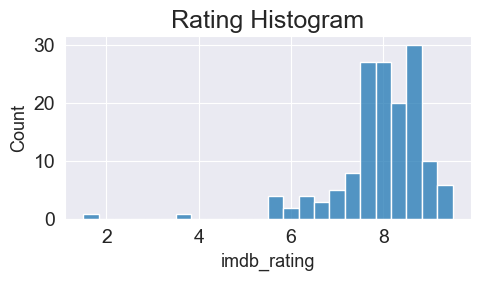

In [21]:
plt.figure(figsize=(5,3), tight_layout=True)
ax = sns.histplot(data=shows, x = 'imdb_rating')
ax.set(title='Rating Histogram')
plt.show()

Fairly well distributed from 6 to 9+

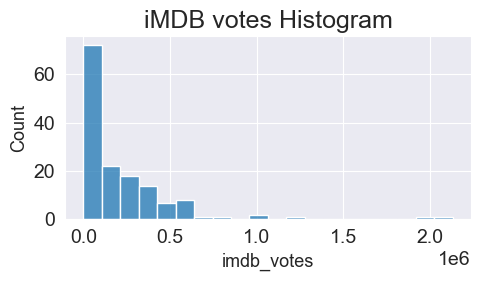

In [22]:
plt.figure(figsize=(5,3), tight_layout=True)
ax = sns.histplot(data=shows, x = 'imdb_votes')
ax.set(title='iMDB votes Histogram')
plt.show()

Left skewed, may need to transform

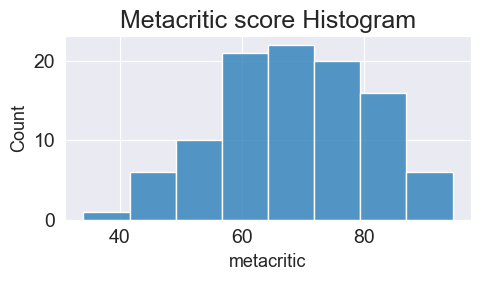

In [23]:
plt.figure(figsize=(5,3), tight_layout=True)
ax = sns.histplot(data=shows, x = 'metacritic')
ax.set(title='Metacritic score Histogram')
plt.show()

Well distributed

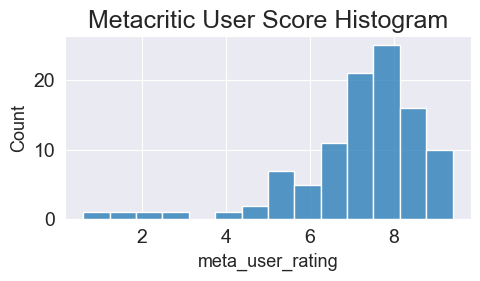

In [24]:
plt.figure(figsize=(5,3), tight_layout=True)
ax = sns.histplot(data=shows, x = 'meta_user_rating')
ax.set(title='Metacritic User Score Histogram')
plt.show()

Well distributed around 6-8

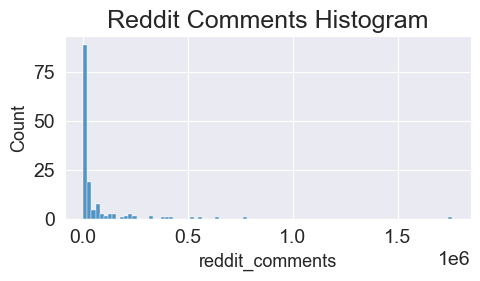

In [25]:
plt.figure(figsize=(5,3), tight_layout=True)
ax = sns.histplot(data=shows, x = 'reddit_comments')
ax.set(title='Reddit Comments Histogram')
plt.show()

Extremely left skewed

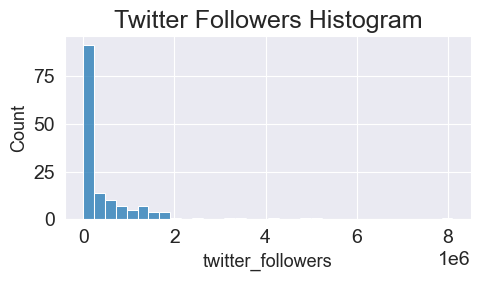

In [26]:
plt.figure(figsize=(5,3), tight_layout=True)
ax = sns.histplot(data=shows, x = 'twitter_followers')
ax.set(title='Twitter Followers Histogram')
plt.show()

Extremely left skewed, 0 inflated

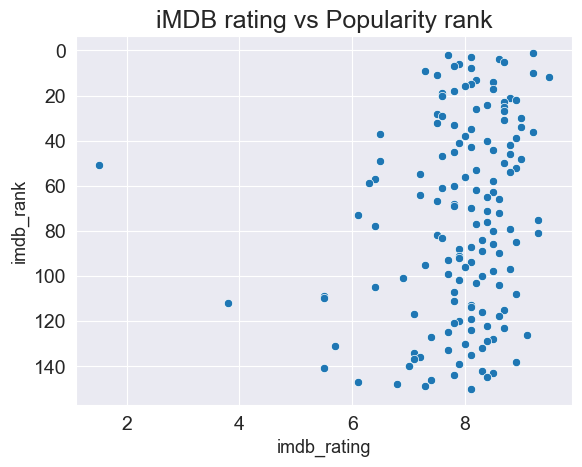

In [27]:
scatter = sns.scatterplot(x='imdb_rating',y='imdb_rank', data=shows)
scatter.set_title('iMDB rating vs Popularity rank')
plt.gca().invert_yaxis()

plt.show()

There is no clear correlation between imdb rating and a shows popularity rank

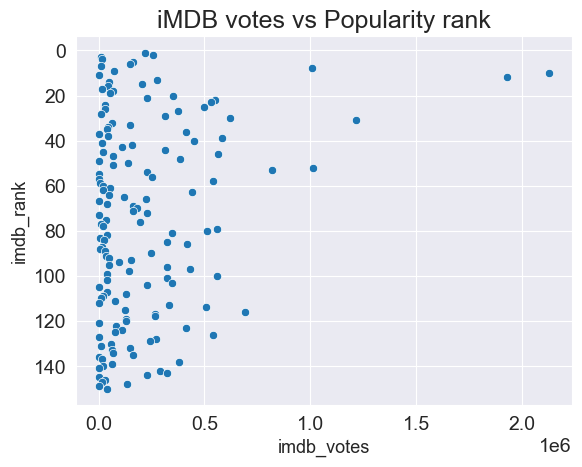

In [28]:
scatter = sns.scatterplot(x='imdb_votes',y='imdb_rank', data=shows)
scatter.set_title('iMDB votes vs Popularity rank')
plt.gca().invert_yaxis()

plt.show()

Here we see a slight correlation, with the most popular shows having the most votes on iMDB

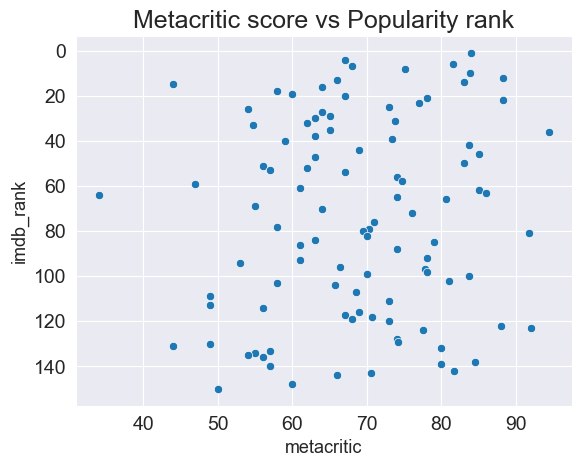

In [29]:
scatter = sns.scatterplot(x='metacritic',y='imdb_rank', data=shows)
scatter.set_title('Metacritic score vs Popularity rank')
plt.gca().invert_yaxis()

plt.show()

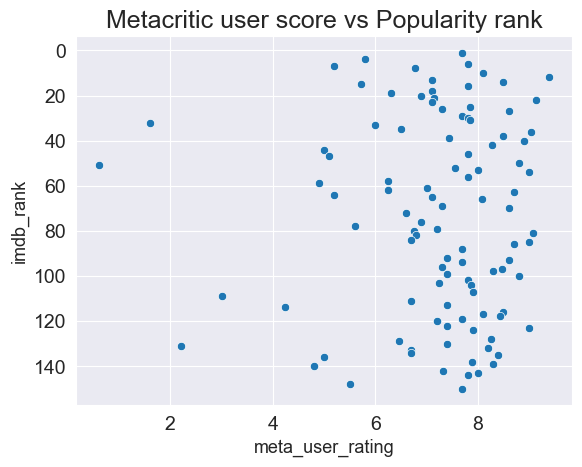

In [30]:
scatter = sns.scatterplot(x='meta_user_rating',y='imdb_rank', data=shows)
scatter.set_title('Metacritic user score vs Popularity rank')
plt.gca().invert_yaxis()

plt.show()

No clear correlation in either metacritic data points, might be removed from data

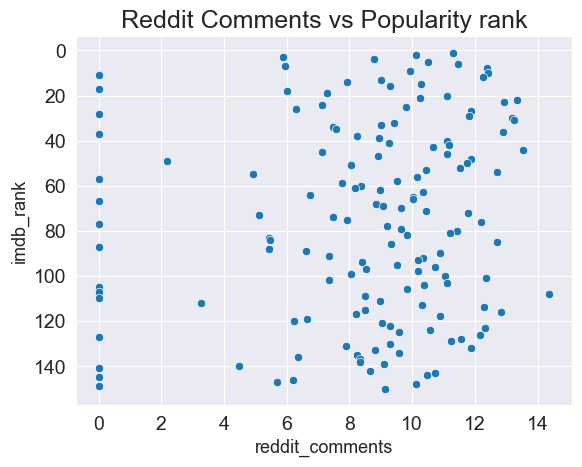

In [31]:
scatter = sns.scatterplot(x=shows['reddit_comments'].apply(lambda x: np.log1p(x)),y='imdb_rank', data=shows)
scatter.set_title('Reddit Comments vs Popularity rank')
plt.gca().invert_yaxis()

plt.show()

We see little correlation here, a log + 1 transformation was used due to 0 inflated left skewed data

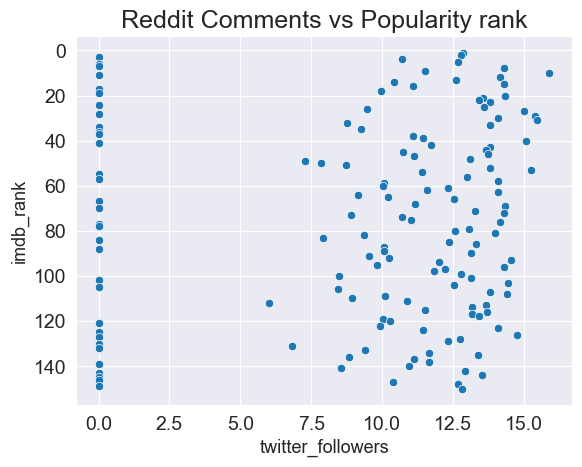

In [32]:
scatter = sns.scatterplot(x=shows['twitter_followers'].apply(lambda x: np.log1p(x)),y='imdb_rank', data=shows)
scatter.set_title('Reddit Comments vs Popularity rank')
plt.gca().invert_yaxis()

plt.show()

We see little correlation here, a log + 1 transformation was used due to 0 inflated left skewed data

### Categorical Data

In [33]:
categorical = shows.select_dtypes(include=[object])
categorical.describe().T

,count,unique,top,freq
name,150,150,The Last of Us,1
years,148,64,2023-,23
genre,148,76,['Comedy'],10
service,150,12,Netflix,37


In [34]:
categorical['imdb_rank'] = shows['imdb_rank']

In [35]:
categorical.years.value_counts()

2023-        23
2022-        18
2021-         9
2019-         6
2017-         5
             ..
2005-2017     1
1998-2006     1
2016-2022     1
2002-2008     1
2015-2023     1
Name: years, Length: 64, dtype: int64

#### Creating a new variable 'Status' that tracks if a show is currently airing or now

In [36]:
def series_status(years):
    if years.endswith('-'):
        return 'current'
    else:
        return 'finished'

In [37]:
categorical.years = categorical.years.astype(str)
categorical['status'] = categorical.years.apply(series_status)

In [38]:
categorical.status.describe()

count         150
unique          2
top       current
freq           92
Name: status, dtype: object

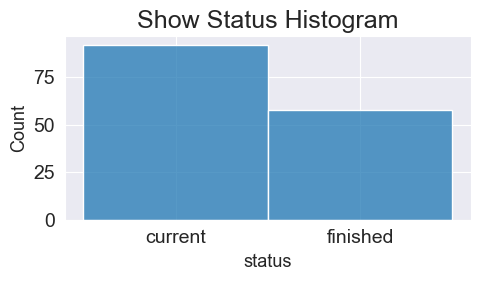

In [39]:
plt.figure(figsize=(5,3), tight_layout=True)
ax = sns.histplot(data=categorical, x = 'status')
ax.set(title='Show Status Histogram')
plt.show()

We see that most of the shows in the iMDB top 150 are currently airing.

In [40]:
shows['status'] = categorical['status']

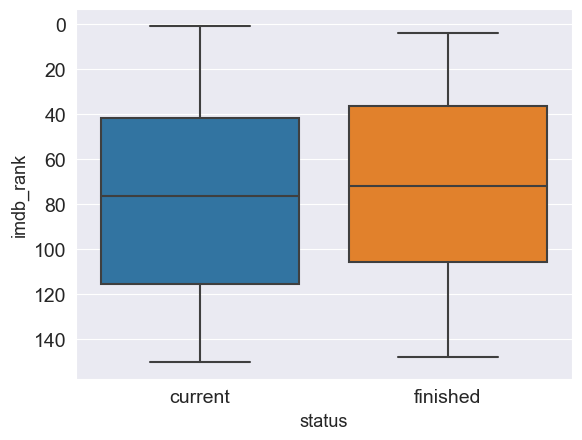

In [41]:
sns.boxplot(x='status', y='imdb_rank', data=categorical)
plt.gca().invert_yaxis()

plt.show()

Finished shows tend to be slightly higher in the popularity rankings than current shows, but the most popular shows are current

#### Creating a new column that tracks how long a show has run for

This is numeric data, but will be explored here.

In [42]:
def getRuntime(years):
    start_end = years.split('-')
    try:
        if len(start_end) == 1 or start_end[1] == '':
            return 2023 - int(start_end[0]) + 1
        else:
            return int(start_end[1]) - int(start_end[0]) + 1
    except:
        return None

In [43]:
shows.years = shows.years.astype(str)

shows['runtime'] = shows.years.apply(getRuntime)

In [44]:
shows.runtime.describe()

count    148.000000
mean       7.297297
std        6.760690
min        1.000000
25%        2.000000
50%        6.000000
75%       10.000000
max       35.000000
Name: runtime, dtype: float64

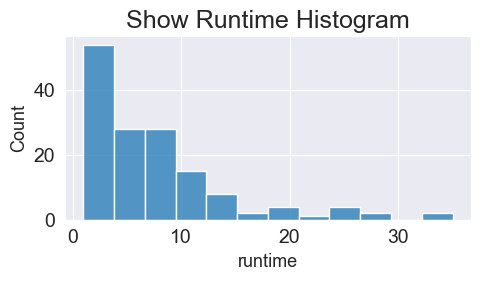

In [45]:
plt.figure(figsize=(5,3), tight_layout=True)
ax = sns.histplot(data=shows, x = 'runtime')
ax.set(title='Show Runtime Histogram')
plt.show()

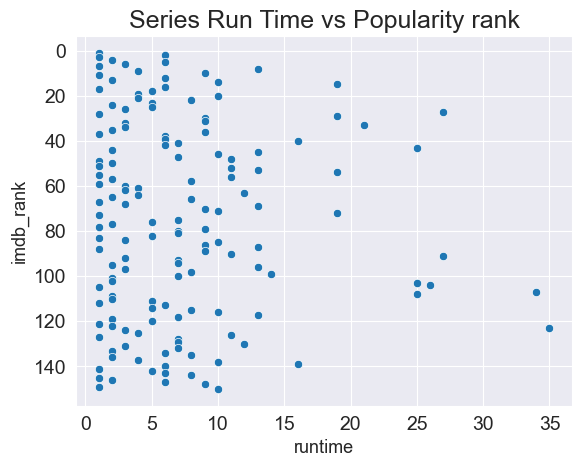

In [46]:
scatter = sns.scatterplot(x='runtime',y='imdb_rank', data=shows)
scatter.set_title('Series Run Time vs Popularity rank')
plt.gca().invert_yaxis()

plt.show()

New shows appear to dominate the most popular shows, which makes sense. However, some long running shows are still very popular.

In [47]:
categorical.genre.describe()

count            148
unique            76
top       ['Comedy']
freq              10
Name: genre, dtype: object

In [48]:
categorical['genre'] = categorical['genre'].astype(str)

In [49]:
regex = r'^\[\'([A-Z][a-z]+)'
categorical['primary_genre'] = categorical['genre'].str.extract(regex)

Due to there being multiple genres for the majority of shows, the primary genre will be extracted from each show for similicity.

In [50]:
categorical.primary_genre.describe()

count        148
unique         9
top       Comedy
freq          35
Name: primary_genre, dtype: object

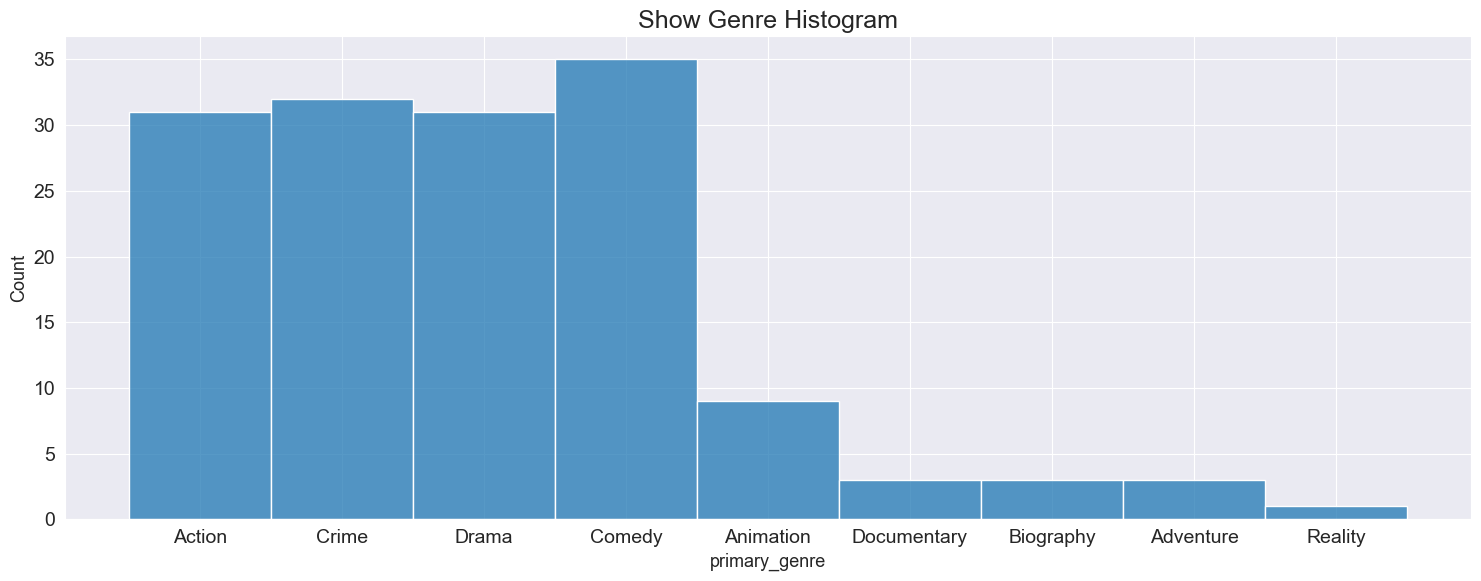

In [51]:
plt.figure(figsize=(15,6), tight_layout=True)
ax = sns.histplot(data=categorical, x = 'primary_genre')
ax.set(title='Show Genre Histogram')
plt.show()

In [52]:
shows['primary_genre'] = categorical['primary_genre']

Action, Crime, Drama, and Comedy dominate the most popular shows. Animation also has several shows in the top 150.

In [53]:
categorical.service.describe()

count         150
unique         12
top       Netflix
freq           37
Name: service, dtype: object

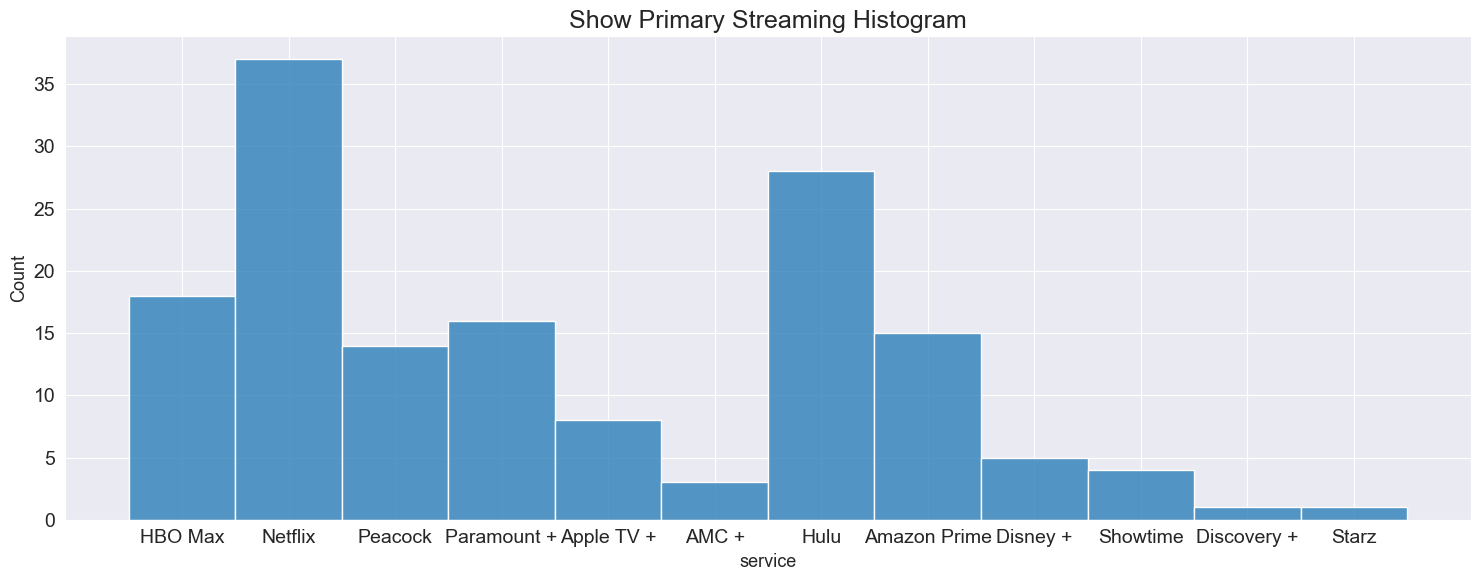

In [54]:
plt.figure(figsize=(15,6), tight_layout=True)
ax = sns.histplot(data=categorical, x = 'service')
ax.set(title='Show Primary Streaming Histogram')
plt.show()

The most popular SVODs (Hulu and Netflix) dominate the most popular shows.

## Data Cleaning

### Handling NULL values

In [55]:
nulls = shows.isnull().sum()
nulls

name                  0
imdb_rank             0
years                 0
genre                 2
imdb_rating           2
imdb_votes            2
metacritic           48
meta_user_rating     48
service               0
reddit_comments       0
twitter_followers     0
status                0
runtime               2
primary_genre         2
dtype: int64

Almost a third of the data has null values for Metacritic critic and user score. These columns will be deleted from the data.

In [56]:
del shows['metacritic']
del shows['meta_user_rating']

Two shows have null values in several columns, it is likely that these are the same shows.

In [57]:
rows_with_null = shows[shows.isnull().any(axis=1)]
rows_with_null.head()

,name,imdb_rank,years,genre,imdb_rating,imdb_votes,service,reddit_comments,twitter_followers,status,runtime,primary_genre
73,Jack Ryan,74,nan,NaN,NaN,NaN,Paramount +,1755,43800,finished,NaN,NaN
105,House M.D.,106,nan,NaN,NaN,NaN,Amazon Prime,18894,4665,finished,NaN,NaN


The hypothesis was correct, these two shows will be removed from the data.

In [58]:
indices = shows[shows.isin(rows_with_null.to_dict(orient='list')).all(axis=1)].index
shows = shows.drop(indices)

In [59]:
nulls = shows.isnull().sum()
nulls

name                 0
imdb_rank            0
years                0
genre                0
imdb_rating          0
imdb_votes           0
service              0
reddit_comments      0
twitter_followers    0
status               0
runtime              0
primary_genre        0
dtype: int64

All NULL values have been handled, and we can proceed.

### Handling Outliers

In [60]:
shows.describe().T

,count,mean,std,min,25%,50%,75%,max
imdb_rank,148.0,75.304054,4.366690e+01,1.0,37.75,75.5,113.25,150.0
imdb_rating,148.0,7.925000,1.018193e+00,1.5,7.60,8.1,8.50,9.5
imdb_votes,148.0,214927.202703,3.075942e+05,410.0,29234.25,116278.5,312531.75,2129030.0
reddit_comments,148.0,73715.966216,1.879425e+05,0.0,1509.00,10633.5,55756.00,1760582.0
twitter_followers,148.0,549513.020270,1.089018e+06,0.0,4281.50,80950.0,653750.00,8100000.0
runtime,148.0,7.297297,6.760690e+00,1.0,2.00,6.0,10.00,35.0


There are no unrealistic outliers in the data that need to be dealt with immediately

However, we see that there are some outliers in our data. Specifically with reddit_comments. This will be handled during the preprocessing step.

### Removing unused columns

In [61]:
shows.head()

,name,imdb_rank,years,genre,imdb_rating,imdb_votes,service,reddit_comments,twitter_followers,status,runtime,primary_genre
0,The Last of Us,1,2023-,"['Action', 'Adventure', 'Drama', 'Horror', 'Sc...",9.2,220703.0,HBO Max,80894,388300,current,1.0,Action
1,You,2,2018-,"['Crime', 'Drama', 'Romance', 'Thriller']",7.7,257575.0,Netflix,25171,360700,current,6.0,Crime
2,Poker Face,3,2023-,"['Crime', 'Drama', 'Mystery']",8.1,13047.0,Peacock,353,0,current,1.0,Crime
3,1923,4,2022-2023,"['Drama', 'Western']",8.6,17809.0,Paramount +,6480,44500,finished,2.0,Drama
4,Yellowstone,5,2018-2023,"['Drama', 'Western']",8.7,162886.0,Peacock,36407,319100,finished,6.0,Drama


name, years (as we have created two columns that use this column's data), and genre (due to primary_genre) are all features that will not be used in predicting show popularity.

In [62]:
del shows['name']
del shows['genre']
del shows['years']

## Preprocessing

We will use sklearn's built-in preprocessing capabilities to preprocess the data. We will use pipelines to do so. SimpleImputer will handle missing values. StandardScaler will be used to scale our data and hangle outliers and OneHotEncoder will one hot encode categorical data.

In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [64]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse= False))
])

In [65]:
shows.head()

,imdb_rank,imdb_rating,imdb_votes,service,reddit_comments,twitter_followers,status,runtime,primary_genre
0,1,9.2,220703.0,HBO Max,80894,388300,current,1.0,Action
1,2,7.7,257575.0,Netflix,25171,360700,current,6.0,Crime
2,3,8.1,13047.0,Peacock,353,0,current,1.0,Crime
3,4,8.6,17809.0,Paramount +,6480,44500,finished,2.0,Drama
4,5,8.7,162886.0,Peacock,36407,319100,finished,6.0,Drama


In [66]:
categorical_cols = ['service', 'primary_genre', 'status']
numeric_cols = ['imdb_rating', 'imdb_votes', 'reddit_comments', 'twitter_followers', 'runtime']

In [67]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ], remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor,', preprocessor)
])

### Applying Pipeline

In [68]:
shows.service = shows.service.astype(str)
shows.primary_genre = shows.primary_genre.astype(str)
shows.status = shows.status.astype(str)

In [69]:
x = shows.drop('imdb_rank', axis=1)
y = shows['imdb_rank']
preprocessed_x = pipeline.fit_transform(x)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Popularity Model

Due to the small size of my dataset, I would like to use either a Linear Regression, KNN or SVM as they are likely to be more effective when working with such a dataset. I will use Grid Search Cross Validation to tine the hyperparameters and decide between the two models.

I will use classification models as opposed to regression models due to the fact that I am performing an ordinal prediction.

In [70]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

### Create Train Test Split

In [71]:
x_train, x_test, y_train, y_test = train_test_split(preprocessed_x, y, test_size = 0.2, random_state=6)

### Define Tested Hyperparameters

In [72]:
models = {
    'LinearRegression': LinearRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}

In [73]:
params = {
    'LinearRegression': {},
    'KNN': {
        'n_neighbors': [2, 3]
    },
    'SVM': {
        'C': [0.01, 0.1, 1, 10],
        'kernel': ['linear','rbf', 'poly']
        
    }
}

We will be using 10-fold CV to test the models.

In [74]:
cv = KFold(n_splits=10, shuffle=True, random_state=6)

In [75]:
grids = {}
for name, model in models.items():
    print(f'Training {name}')
    grids[name] = GridSearchCV(estimator=model, param_grid=params[name], cv=cv, scoring='neg_mean_squared_error',verbose=2)
    grids[name].fit(x_train, y_train)
    optimal_params = grids[name].best_params_
    best_score = np.sqrt(-1*grids[name].best_score_)
    print(f'Optimal Parameters for {name}: {optimal_params}\nBest RMSE for {name}: {best_score}')

Training LinearRegression
Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Optimal Parameters for LinearRegression: {}
Best RMSE for LinearRegression: 49.52039859347242
Training 

The RMSE for each of the models is extremely poor. This is likely due to the lack of data and the randomness of the features. It appears to be extremely difficult to predict when a show will become popular based on a small subset of factors. However, the linear regression model preformed the best and will be used.

### Sample Prediction

In [76]:
linear_model = grids['LinearRegression']

In [79]:
def predictShow(rating, votes, service, comments, followers, status, runtime, genre):
    
    feature_array = {'imdb_rating':rating, 'imdb_votes':votes, 'service':service, 'reddit_comments':comments, 'twitter_followers':followers, 'status':status, 'runtime':runtime, 'primary_genre':genre}
    new_df = x.append(feature_array, ignore_index=True)
    preprocessed = pipeline.fit_transform(new_df)
    prediction = linear_model.predict(preprocessed)
    return round(prediction[len(prediction)-1],2)



In [80]:
pred = predictShow(9.0,10000,'Hulu',100000,1000000,'current',2.0,'Comedy')
pred

/var/folders/3v/866x8bfs7hb47f11mt9d5vdc0000gn/T/ipykernel_9560/1242112300.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = x.append(feature_array, ignore_index=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


77.02

## Conclusions

The model preformance was extremely poor. This is overwhelmingly likely to be caused by the use of just 150 data points. In a future experiment, it would be more wise to collect a far larger amount of data when trying to model something as complex as show popularity. However, this model still has some use in predicting a TV show's popularity, but should not be taken at face value.